In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

from data_library import *
from map_library import *

In [2]:
density_table = np.loadtxt("Kano_density_table.txt")

length, width = density_table.shape

print(length, width)

760 684


### Réflexion sur les echelles
Le nombre dans A correspond à la population sur un carré 13x13 pixels sur Python, donc chaque pixel compte pour $\frac{v_{pixel}}{13 \times 13}$.

La distance réelle est de 5 km selon l'axe des ordonnées (lignes).

In [3]:
scale = 5000/length # chaque pixel dans Python est un carré de coté de taille scale (en mètre)

### Paramétrage pour le problème

In [4]:
Nb = 100  # Nombre de biodigesteurs à placer
Rmax= 1000 # Rayon de portée maximale (en mètres) d'un biodigesteur
b_capacity = 2000 # Nombre de personne pouvant accéder au même biodigesteur

farms_coord = np.array([[120,0],[550,0],[670,0],[759,600],[0,250],[200,683]])    #Positionnement des entrées des fermes sur la carte
farms_capacity = np.zeros(len(farms_coord))


In [5]:
biodigester_coords = initialize_coord(Nb,length,width)
biodigester_coords

array([[608., 682.],
       [562., 450.],
       [371., 530.],
       [548., 552.],
       [ 17., 189.],
       [188., 473.],
       [ 83., 662.],
       [387., 412.],
       [655., 415.],
       [ 23., 317.],
       [158.,  22.],
       [738., 423.],
       [114., 630.],
       [521., 269.],
       [332., 190.],
       [ 76.,  63.],
       [285., 408.],
       [465., 148.],
       [577., 180.],
       [716., 121.],
       [496., 581.],
       [399., 253.],
       [204., 256.],
       [458., 210.],
       [543., 367.],
       [518., 236.],
       [644., 239.],
       [186., 161.],
       [217., 639.],
       [ 51., 128.],
       [753., 469.],
       [285., 497.],
       [593., 525.],
       [ 83., 134.],
       [308.,  20.],
       [550., 429.],
       [120., 152.],
       [434., 332.],
       [587., 303.],
       [630., 358.],
       [628., 213.],
       [597., 502.],
       [147., 494.],
       [170.,  76.],
       [199., 191.],
       [383., 335.],
       [725., 101.],
       [266.,

In [6]:
R_list = compute_R_list(density_table,biodigester_coords,Rmax,b_capacity,scale)
R_list

array([614.74609375, 431.15234375, 510.25390625, 556.15234375,
       332.51953125, 364.74609375, 661.62109375, 246.58203125,
       391.11328125, 338.37890625, 114.74609375, 108.88671875,
       516.11328125, 114.74609375, 108.88671875, 108.88671875,
       260.25390625, 108.88671875, 108.88671875, 568.84765625,
       529.78515625, 135.25390625, 147.94921875, 121.58203125,
       128.41796875, 147.94921875, 207.51953125, 121.58203125,
       858.88671875, 135.25390625, 266.11328125, 510.25390625,
       536.62109375, 121.58203125, 108.88671875, 299.31640625,
       108.88671875, 108.88671875, 108.88671875, 364.74609375,
       239.74609375, 582.51953125, 417.48046875, 108.88671875,
       114.74609375, 114.74609375, 450.68359375, 108.88671875,
       193.84765625, 135.25390625, 470.21484375, 457.51953125,
       312.01171875, 345.21484375, 121.58203125, 167.48046875,
       200.68359375, 167.48046875, 108.88671875, 364.74609375,
       443.84765625, 542.48046875, 108.88671875, 279.78

In [7]:
intersections = compute_intersections(biodigester_coords, R_list,scale)
intersections

array([9.35286809e+01, 4.96062168e+02, 8.21309994e+02, 4.92348148e+02,
       6.27842521e+00, 5.12978993e+02, 4.30090486e+02, 1.21696879e+02,
       2.16394626e+02, 8.85124752e+01, 0.00000000e+00, 2.55210953e+01,
       4.74430196e+02, 6.79360445e+00, 0.00000000e+00, 0.00000000e+00,
       2.02581960e+02, 0.00000000e+00, 0.00000000e+00, 2.40115597e+02,
       4.30230765e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.07497047e+01, 6.79360445e+00, 1.30621876e+02, 3.22630955e+00,
       1.24221072e+03, 7.74746276e+00, 1.34356631e+01, 1.16041085e+03,
       4.86868173e+02, 6.48142131e+00, 0.00000000e+00, 2.92091162e+02,
       0.00000000e+00, 0.00000000e+00, 2.17814880e+00, 1.95805481e+02,
       1.12810062e+02, 5.90841195e+02, 4.61509315e+02, 9.69216268e+00,
       3.22630955e+00, 2.68623470e-01, 1.40289486e+02, 8.58626116e+00,
       3.83930564e+01, 0.00000000e+00, 8.67182165e+02, 8.68686023e+02,
       1.33517520e+02, 3.19075636e+02, 0.00000000e+00, 1.99219088e+02,
      

In [8]:
Nbt = 2

In [9]:
B = []

for i in range(Nb):
    B.append(biodigester(Nbt,biodigester_coords[i][0], biodigester_coords[i][1],intersections[i],R_list[i]))

In [10]:
farms_capacity = [200,400,300,100,250,350]
Nf = 6

In [11]:
F = []

for i in range(Nf):
    F.append(farm(farms_capacity[i],farms_coord[i][0],farms_coord[i][1]))

In [12]:
E = PriorityQueue()

for i,f in enumerate(F):
    for j,b in enumerate(B):
        e = edge(i,j,distance(f.x,f.y,b.x,b.y))
        f.addEdge(e.id)
        b.addEdge(e.id)
        E.push(e)

### Premiers calculs

In [13]:
# Calcul des trajets

Nft_tot = sum([f.Nft for f in F])
Nbt_tot = Nbt*Nb


#Collecte pour potentiel affichage graphique

Efinal = []

while Nft_tot != 0 and Nbt_tot != 0 and not E.isEmpty() :
    e = E.pop()
    
    #Tant qu'on peut encore remplir le même  biodigesteur avec la même ferme, on continue :
    while B[e.b_id].Nbt !=0 :
        
        # S'il n'y a plus de tracteurs pour la ferme, on supprime toutes les arêtes de E le comportant
        if F[e.f_id].Nft == 0:
            for e_id in F[e.f_id].Vf:
                E.remove(e_id)
            break
    
        # Sinon
    
        Efinal.append(e)
        
        # On retient la distance entre le biodigesteur et sa ferme
        B[e.b_id].d += e.d
        
        # On retire e des arêtes liées au site et on décrémente le nombre de tracteurs disponibles (localement et globalement)
        B[e.b_id].Nbt -= 1
        F[e.f_id].Nft -= 1
        
        Nft_tot -= 1
        Nbt_tot -= 1
    
    #Si la boucle s'est terminée et que le biodigesteur est plein :
    if B[e.b_id].Nbt == 0:
        for e_id in B[e.b_id].Vb:
            E.remove(e_id)   
    
    

In [14]:
[[e.f_id, e.b_id] for e in Efinal]

[[2, 99],
 [2, 99],
 [2, 95],
 [2, 95],
 [5, 87],
 [5, 87],
 [2, 90],
 [2, 90],
 [0, 71],
 [0, 71],
 [5, 69],
 [5, 69],
 [1, 40],
 [1, 40],
 [1, 38],
 [1, 38],
 [5, 51],
 [5, 51],
 [5, 45],
 [5, 45],
 [1, 34],
 [1, 34],
 [2, 66],
 [2, 66],
 [0, 7],
 [0, 7],
 [2, 59],
 [2, 59],
 [2, 57],
 [2, 57],
 [5, 9],
 [5, 9],
 [1, 25],
 [1, 25],
 [1, 24],
 [1, 24],
 [5, 42],
 [5, 42],
 [2, 41],
 [2, 41],
 [0, 29],
 [0, 29],
 [0, 58],
 [0, 58],
 [1, 15],
 [1, 15],
 [2, 30],
 [2, 30],
 [1, 13],
 [1, 13],
 [2, 23],
 [2, 23],
 [4, 43],
 [4, 43],
 [2, 18],
 [2, 18],
 [4, 44],
 [4, 44],
 [0, 14],
 [0, 14],
 [1, 3],
 [1, 3],
 [5, 1],
 [5, 1],
 [2, 46],
 [2, 46],
 [1, 47],
 [1, 47],
 [1, 97],
 [1, 97],
 [3, 89],
 [3, 89],
 [1, 91],
 [1, 91],
 [0, 49],
 [0, 49],
 [1, 85],
 [1, 85],
 [1, 82],
 [1, 82],
 [5, 20],
 [5, 20],
 [3, 53],
 [3, 53],
 [1, 73],
 [1, 73],
 [4, 81],
 [4, 81],
 [3, 35],
 [3, 35],
 [1, 64],
 [1, 64],
 [5, 61],
 [5, 61],
 [5, 65],
 [5, 65],
 [3, 11],
 [3, 11],
 [1, 52],
 [1, 52],
 [5, 94]

In [15]:
print(Nbt_tot, Nft_tot, E.isEmpty())

0 1400 True


In [16]:
def intersections_penalty(b : biodigester):
    return b.intersections

def length_penalty(b : biodigester):
    return b.d

def R_penalty(b : biodigester):
    return b.R

def penalty(b : biodigester):
    return 5*intersections_penalty(b)**2 + length_penalty(b)**2 + 3*R_penalty(b)**2

def global_penalty(B):
    res = 0
    for b in B:
        res += penalty(b)
    return res

In [26]:
def new_population(Nb : int):
    coords = initialize_coord(Nb,length,width)
    R_list = compute_R_list(density_table,coords,Rmax,b_capacity,scale)
    intersections = compute_intersections(coords,R_list,scale)
    B = []
    for i in range(Nb):
        B.append(biodigester(Nbt,coords[i][0], coords[i][1],intersections[i],R_list[i]))
    return B, coords, R_list, intersections

def place_farms(coords, capacity):
    F = []
    for i in range(Nf):
        F.append(farm(capacity[i],coords[i][0],coords[i][1]))
    return F

def run(B : np.ndarray, F: np.ndarray):
    
    #Initialisation des trajets possibles
    
    E = PriorityQueue()

    for i,f in enumerate(F):
        for j,b in enumerate(B):
            e = edge(i,j,distance(f.x,f.y,b.x,b.y))
            f.addEdge(e.id)
            b.addEdge(e.id)
            E.push(e)
    
    
    # Calcul des trajets

    Nft_tot = sum([f.Nft for f in F])
    Nbt_tot = Nbt*Nb
    
    #Collecte pour potentiel affichage graphique

    Efinal = []

    while Nft_tot != 0 and Nbt_tot != 0 and not E.isEmpty() :
        e = E.pop()
        
        #Tant qu'on peut encore remplir le même  biodigesteur avec la même ferme, on continue :
        while B[e.b_id].Nbt !=0 :
            
            # S'il n'y a plus de tracteurs pour la ferme, on supprime toutes les arêtes de E le comportant
            if F[e.f_id].Nft == 0:
                for e_id in F[e.f_id].Vf:
                    E.remove(e_id)
                break
        
            # Sinon
        
            Efinal.append(e)
            
            # On retient la distance entre le biodigesteur et sa ferme
            B[e.b_id].d += e.d
            
            # On retire e des arêtes liées au site et on décrémente le nombre de tracteurs disponibles (localement et globalement)
            B[e.b_id].Nbt -= 1
            F[e.f_id].Nft -= 1
            
            Nft_tot -= 1
            Nbt_tot -= 1
        
        #Si la boucle s'est terminée et que le biodigesteur est plein :
        if B[e.b_id].Nbt == 0:
            for e_id in B[e.b_id].Vb:
                E.remove(e_id)   
        
    return Efinal

def update_position(b : biodigester, global_best_x : int, global_best_y : int, inertia=0.5, cognitive=1, social=0.2):
    # Mise à jour de la position en fonction du meilleur résultat local et global
    dx = random.uniform(0, 1) * cognitive * (b.best_x - b.x) + random.uniform(0, 1) * social * (global_best_x - b.x)
    dy = random.uniform(0, 1) * cognitive * (b.best_y - b.y) + random.uniform(0, 1) * social * (global_best_y - b.y)
    b.x += inertia * dx
    b.y += inertia * dy
    return b.x, b.y

def evaluate(b:biodigester):
    p = penalty(b)
    if p < b.best_score:
        b.best_score = p
        b.best_x = b.x
        b.best_y = b.y

def algorithme_essaim(Nb: int, iterations : int):
    B, biodigester_coords, R_list, intersections = new_population(Nb)
    F = place_farms(farms_coord,farms_capacity)
    global_best_score = float('inf')
    global_best_x = 0
    global_best_y = 0
    
    for _ in tqdm(range(iterations)):
        for b in B:
            b.d = 0

        E = run(B,F)
        
        for b in B:
            evaluate(b)
        
        # Trouver le meilleur score global et sa position
        for b in B:
            if b.best_score < global_best_score:
                global_best_score = b.best_score
                global_best_x = b.best_x
                global_best_y = b.best_y
        
        # Mettre à jour les positions des bâtiments et leurs attributs
        
        for i,b in enumerate(B):
            biodigester_coords[i] = update_position(b, global_best_x, global_best_y)
        
        R_list = compute_R_list(density_table, biodigester_coords,Rmax,b_capacity,scale)
        intersections = compute_intersections(biodigester_coords,R_list,scale)
        
        for i,b in enumerate(B):
            b.R = R_list[i]
            b.intersections = intersections[i]
    
    return B, E

In [27]:
B,E = algorithme_essaim(Nb,20)

100%|██████████| 20/20 [01:20<00:00,  4.05s/it]


In [32]:
b_x = [b.x for b in B]
b_y = [b.y for b in B]

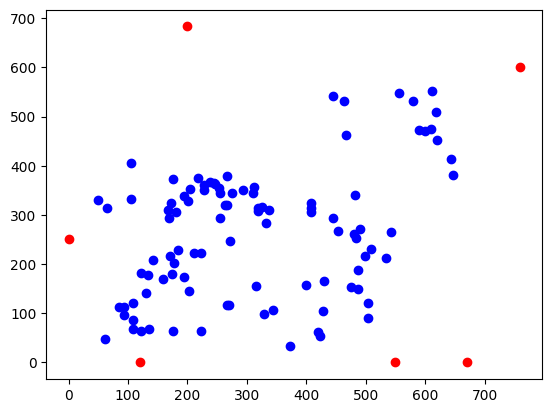

In [39]:
plt.scatter(b_x,b_y, c='b', label='biodigesteur')
plt.scatter(farms_coord[:,0],farms_coord[:,1],c='r', label='fermes')